# Evaluation

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sacrebleu import CHRF, TER, corpus_bleu

from src.config import RESULTS_DIR, TRANSLATIONS_DIR
from src.utils import load_file

[CONFIG] Directories ensured and random seed set.


Upload the translations to `data/translations` and revise the filepaths below accordingly.

In [2]:
refs = load_file(TRANSLATIONS_DIR / "test.tgt")
models = {
    "GRU-Base": load_file(TRANSLATIONS_DIR / "base.txt"),
    "GRU-Aug": load_file(TRANSLATIONS_DIR / "aug.txt"),
    "GRU-Aug-CBK": load_file(TRANSLATIONS_DIR / "aug-cbk.txt"),
}

Let us compute for different evaluation metrics, namely BLEU, CHRF, and TER.

In [3]:
results = []

chrf = CHRF()
ter = TER()

for name, preds in models.items():
    bleu_score = corpus_bleu(preds, [refs])
    chrf_score = chrf.corpus_score(preds, [refs])
    ter_score = ter.corpus_score(preds, [refs])

    results.append(
        {
            "Model": name,
            "BLEU": bleu_score.score,
            "CHRF": chrf_score.score,
            "TER": ter_score.score,
        }
    )

    print(f"\n[{name}]")
    print(f"BLEU: {bleu_score.score:.2f}")
    print(f"CHRF: {chrf_score.score:.2f}")
    print(f"TER: {ter_score.score:.2f}")

results_df = pd.DataFrame(results).set_index("Model")


[GRU-Base]
BLEU: 0.19
CHRF: 11.75
TER: 97.46

[GRU-Aug]
BLEU: 0.25
CHRF: 10.75
TER: 99.00

[GRU-Aug-CBK]
BLEU: 0.18
CHRF: 12.44
TER: 100.62


Let us visualize the results.

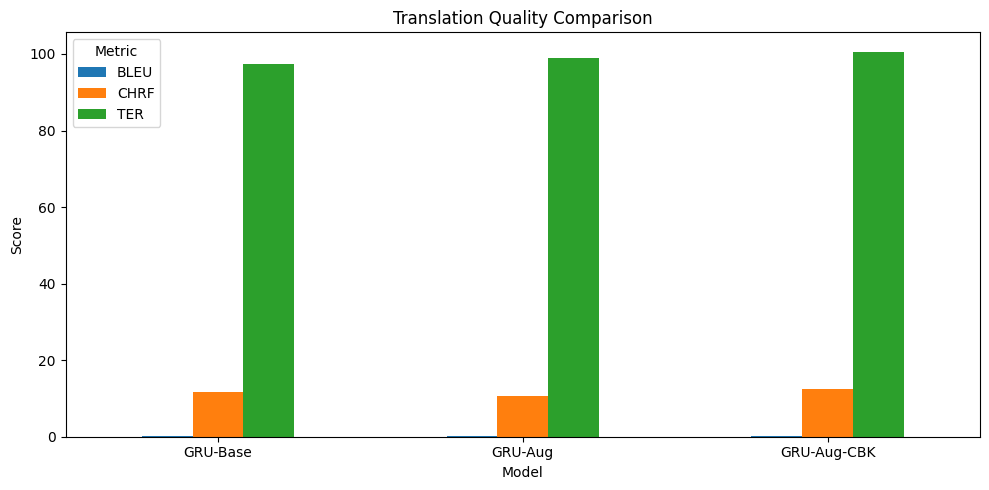

In [4]:
ax = results_df.plot(kind="bar", figsize=(10, 5))
plt.title("Translation Quality Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(title="Metric")
plt.tight_layout()

Let us save the results.

In [5]:
results_df.to_csv(RESULTS_DIR / "metrics_summary.csv")